In [1]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

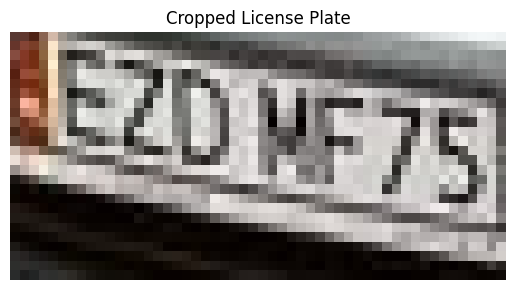

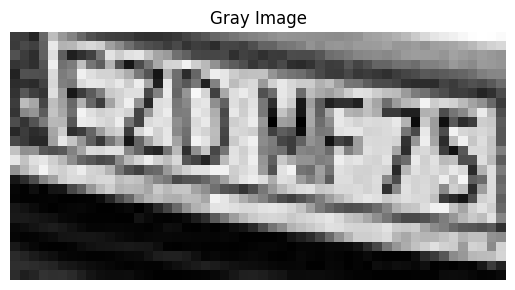

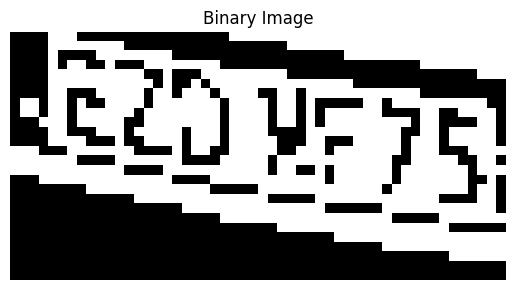

In [13]:
def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images(images, titles=None):
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i] if titles else f'Image {i+1}')
        plt.axis('off')
    plt.show()

cropped_image = cv2.imread('plate2.png')
show_image(cropped_image, "Cropped License Plate")
# bilateral_filtered_image = cv2.bilateralFilter(cropped_image, 5, 50, 2)
# show_image(bilateral_filtered_image, "Bilateral Filtered Image")
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(10, 10))

gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
show_image(gray, "Gray Image")
# clahe_image = clahe.apply(gray)
# show_image(clahe_image, "CLAHE Image")
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
show_image(binary, "Binary Image")
# kernel_size = (2, 2)  # Rozmiar jądra
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# # Zastosuj adaptacyjną filtrację morfologiczną
# adaptative_morphology = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
# show_image(adaptative_morphology, "Adaptative Morphology")

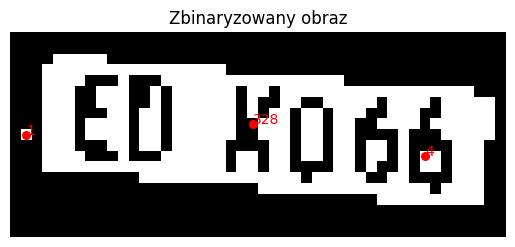

In [5]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary, connectivity=8)
# Wyświetlenie zbinaryzowanego obrazu
plt.imshow(binary, cmap='gray')
plt.title('Zbinaryzowany obraz')
plt.axis('off')

# Wyświetlenie składowych połączonych
for i in range(1, num_labels):
    area = stats[i, cv.CC_STAT_AREA]
    cx = int(centroids[i, 0])
    cy = int(centroids[i, 1])
    plt.text(cx, cy, str(area), color='red')
    plt.scatter(cx, cy, color='red', s=30)
    
plt.show()

Indeks centroidu z największym polem powierzchni: 0


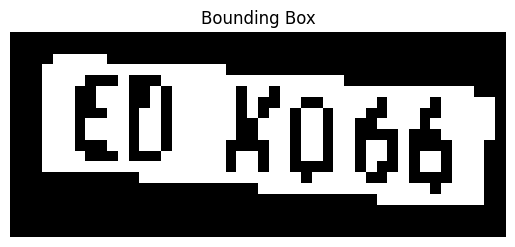

In [6]:
# Znajdź indeks centroidu z największym polem powierzchni (z pominięciem tła)
max_area_index = np.argmax(stats[1:, cv.CC_STAT_AREA]) 
print(f'Indeks centroidu z największym polem powierzchni: {max_area_index}')

# Pobierz współrzędne centroidu o maksymalnym polu powierzchni
max_area_centroid = centroids[max_area_index]

updated_binary_image = np.copy(binary)
# Utwórz bounding box wokół centroidu z największym polem powierzchni
x, y, w, h = stats[max_area_index, cv.CC_STAT_LEFT], stats[max_area_index, cv.CC_STAT_TOP], stats[max_area_index, cv.CC_STAT_WIDTH], stats[max_area_index, cv.CC_STAT_HEIGHT]

# Utwórz kopię obrazu binarnego
updated_binary_image = np.copy(binary)

# Narysuj bounding box wokół obszaru o największym polu powierzchni
cv2.rectangle(updated_binary_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Wyświetl obraz z bounding box
plt.imshow(cv2.cvtColor(updated_binary_image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box')
plt.axis('off')
plt.show()

# # Wycięcie obszaru o największym polu powierzchni z binary_image
# largest_component = np.zeros_like(binary)
# largest_component[labels == max_area_index] = 255

# # Nowa zmienna przechowująca obszary wewnątrz bounding boxa
# updated_binary_image = np.copy(largest_component)

# # Iteracja przez wszystkie etykiety poza tłem
# for i in range(1, num_labels):
#     area = stats[i, cv.CC_STAT_AREA]
#     cx = int(centroids[i, 0])
#     cy = int(centroids[i, 1])
    
#     # Sprawdzenie, czy centroid obszaru znajduje się wewnątrz bounding boxa
#     if x <= cx <= x + w and y <= cy <= y + h:
#         # Jeśli tak, dodaj obszar do updated_binary_image
#         updated_binary_image[labels == i] = 255

# inverted_updated_binary_image = cv.bitwise_not(updated_binary_image)
# # Wyświetlenie zaktualizowanego binarnego obrazu


In [ ]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(inverted_updated_binary_image, connectivity=8)

# Iterate through the connected components and display each cropped area except the largest
plt.figure(figsize=(15, 15))

for i in range(1, num_labels):
    if i == max_area_index:
        continue  # Skip the largest component
    
    x, y, w, h = stats[i, cv.CC_STAT_LEFT], stats[i, cv.CC_STAT_TOP], stats[i, cv.CC_STAT_WIDTH], stats[i, cv.CC_STAT_HEIGHT]
    cropped_image = inverted_updated_binary_image[y:y+h, x:x+w]
    cropped_image = cv.bitwise_not(cropped_image)
    plt.subplot(num_labels - 1, 1, i)
    plt.imshow(cropped_image, cmap='gray')
    plt.title(f'Cropped Image {i}')
    plt.axis('off')

plt.show()